#Sentiment Analysis

## Importing and Installing Packages

In [0]:
!pip install wget
import wget
import sys
!pip install twython

In [0]:
#wget.download("https://github.com/MIE451-1513-2019/course-datasets/raw/master/reviews.zip")
#!unzip reviews.zip

In [0]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas
import numpy as np
import pandas as pd


#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load Data

In [0]:
#Read in from pandas
hotelDf = pandas.read_csv('reviews.csv')
hotelDf.columns=['filePath','hotelName','reviewColumn','ratingScore','groundTruth']
hotelDf.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth
0,data\ca\1156009\10237568\461940044.html,Hotel The Blossom,"""I stayed here with friends for a night halt o...",4,positive
1,data\ca\1156009\10237568\465717089.html,Hotel The Blossom,"""We booked a few hours earlier during travel, ...",5,positive
2,data\ca\1156009\10237568\468170151.html,Hotel The Blossom,"""hotel is situated near the main road but stil...",4,positive
3,data\ca\1156009\10237568\479504591.html,Hotel The Blossom,"""The rooms were nice and clean, and the staff ...",4,positive
4,data\ca\1156009\10237568\485507163.html,Hotel The Blossom,"""Easy room booking , Awesome room service , be...",5,positive


In [0]:
l=list(pd.unique(hotelDf['hotelName'].values.ravel('K')))
len(l)

31

## Sentiment Analysis and Aggregation

In [0]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pandas.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [0]:
reviews = hotelDf['reviewColumn'].values

In [0]:
reviewDF = evalSentences(reviews, to_df=True, columns=['reviewCol','vader'])


100%|██████████| 1134/1134 [00:01<00:00, 1019.34it/s]


In [0]:
reviewDF.head()

,reviewCol,vader
0,"""I stayed here with friends for a night halt o...",0.9514
1,"""We booked a few hours earlier during travel, ...",0.9643
2,"""hotel is situated near the main road but stil...",0.9366
3,"""The rooms were nice and clean, and the staff ...",0.7964
4,"""Easy room booking , Awesome room service , be...",0.9868


In [0]:
reviewDF=reviewDF.drop(['reviewCol'],axis=1,inplace=False)

In [0]:
hotelDf=hotelDf.join(reviewDF)
hotelDf.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,vader
0,data\ca\1156009\10237568\461940044.html,Hotel The Blossom,"""I stayed here with friends for a night halt o...",4,positive,0.9514
1,data\ca\1156009\10237568\465717089.html,Hotel The Blossom,"""We booked a few hours earlier during travel, ...",5,positive,0.9643
2,data\ca\1156009\10237568\468170151.html,Hotel The Blossom,"""hotel is situated near the main road but stil...",4,positive,0.9366
3,data\ca\1156009\10237568\479504591.html,Hotel The Blossom,"""The rooms were nice and clean, and the staff ...",4,positive,0.7964
4,data\ca\1156009\10237568\485507163.html,Hotel The Blossom,"""Easy room booking , Awesome room service , be...",5,positive,0.9868


In [0]:
vdf=hotelDf.groupby('hotelName')['vader'].mean()
vdf=pd.DataFrame(vdf)
vdf

,vader
hotelName,
Casa De Damao,-0.123180
Daman Ganga Valley Resort Pvt. Ltd,0.711219
Dariya Darshan Hotel,0.355205
Forest Village Holiday Homes,0.839598
Fortune Park Galaxy,0.854874
Ginger Vapi,0.775657
Hotel Grand Heritage,0.966100
Hotel Gurukripa,0.721090
Hotel Jazira,0.518172


In [0]:
gtdf=hotelDf.groupby('hotelName')['ratingScore'].mean()
gtdf=pd.DataFrame(gtdf)
gtdf

,ratingScore
hotelName,
Casa De Damao,3.000000
Daman Ganga Valley Resort Pvt. Ltd,3.920000
Dariya Darshan Hotel,2.800000
Forest Village Holiday Homes,4.300000
Fortune Park Galaxy,4.500000
Ginger Vapi,4.444444
Hotel Grand Heritage,4.000000
Hotel Gurukripa,3.642857
Hotel Jazira,3.647059


In [0]:
hotelNames = hotelDf['hotelName'].unique()
hotelNames

array(['Hotel The Blossom', 'Hotel Royal Shelter', 'Ginger Vapi',
       'Fortune Park Galaxy', 'OYO 24135 Hotel Anand Inn',
       'Hotel Woodlands', 'OYO 25065 Hotel Shree Daan',
       'Hotel Silver Leaf', 'Regenta Central Harsha Vapi',
       'Ras Resorts Silvassa', 'Forest Village Holiday Homes',
       'Hotel Krishna', 'Pluz Resort',
       'Daman Ganga Valley Resort Pvt. Ltd', 'Casa De Damao',
       'Hotel Saffron', 'Hotel Miramar', 'Hotel Sovereign',
       'Hotel Gurukripa', 'Hotel Sagar Presidency', 'Le Pension Daman',
       'Silver Sands Beach Resort Daman', 'Dariya Darshan Hotel',
       'Jalsa Bungalow', 'Hotel Jazira', 'OYO 15918 Hotel Silent',
       'Hotel Sea Rock Villa', 'Hotel Grand Heritage', 'Hotel Krisha',
       'Hotel Tania Searock', 'Mirasol Resort'], dtype=object)

In [0]:
def getHotelRank(df, measure='ratingScore'):
    #Rank the hotel by ground truth rating score
    hotelRating = []
    for hotel in hotelNames:
        itemDf = df.loc[df['hotelName']==hotel]
        hotelRating.append([hotel,itemDf[measure].mean()])
    hotelRatingDfGt = pandas.DataFrame(hotelRating)
    hotelRatingDfGt.columns=['hotelName','avgRatingScore']
    hotelRatingDfGt = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0)
    return hotelRatingDfGt

(i) Avg. Ground truth sentiment

In [0]:
hotelRatingDfGt = getHotelRank(hotelDf)
hotelRatingDfGt.head() # Top 5 hotels based on ground truth sentiment

,hotelName,avgRatingScore
3,Fortune Park Galaxy,4.500000
8,Regenta Central Harsha Vapi,4.500000
0,Hotel The Blossom,4.482759
7,Hotel Silver Leaf,4.450000
2,Ginger Vapi,4.444444


In [0]:
hotelRatingDfGt.tail()# Bottom 5 hotels based on ground truth sentiment

,hotelName,avgRatingScore
28,Hotel Krisha,3.00
14,Casa De Damao,3.00
21,Silver Sands Beach Resort Daman,2.99
22,Dariya Darshan Hotel,2.80
23,Jalsa Bungalow,1.00


(ii) Avg. Vader Compund Sentiment Score

In [0]:
hotelRatingDfVd = getHotelRank(hotelDf, measure='vader')
hotelRatingDfVd.head() # Top 5 hotels based on vader sentiment

,hotelName,avgRatingScore
27,Hotel Grand Heritage,0.966100
0,Hotel The Blossom,0.909266
4,OYO 24135 Hotel Anand Inn,0.900200
3,Fortune Park Galaxy,0.854874
10,Forest Village Holiday Homes,0.839598


In [0]:
hotelRatingDfVd.tail() #  Bottom 5 hotels based on vader sentiment

,hotelName,avgRatingScore
21,Silver Sands Beach Resort Daman,0.329474
15,Hotel Saffron,0.302533
28,Hotel Krisha,0.198350
23,Jalsa Bungalow,0.051600
14,Casa De Damao,-0.123180


Comparing the top 5 with average ground truth sentiment and with vader sentiment score it is observed that, 2 out of 5 are similar in both cases.

Where as in case of the bottom 5 with ground truth sentiment and with vader sentiment it is observed that, 4 out of 5 are ranked as bottom five.

This shows that among the 10 observations, vader sentiment is able to recall 60% of the observations correctly. Precision is comparitively less as the ranking of each hotel is different in both cases.



## Frequency Analysis

In [0]:
# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def dataFrameTransformation(Df,k=50):
    reviews = Df['reviewColumn'].values
    
    stop = set(stopwords.words('english'))
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth','reviewColumn']].join(finalreviewDf)
    return topk, finaldf

In [0]:
topk, finaldf = dataFrameTransformation(hotelDf,k=50)

In [0]:
finaldf.head()

,hotelName,ratingScore,groundTruth,reviewColumn,vader,good,hotel,food,room,rooms,staff,stay,place,service,resort,also,one,pool,well,nice,clean,daman,restaurant,breakfast,beach,great,time,nthe,area,best,family,like,excellent,experience,property,would,visit,location,water,stayed,night,maintained,even,vapi,really,quality,swimming,view,small,overall,sea,spacious,big,day,located
0,Hotel The Blossom,4,positive,"""I stayed here with friends for a night halt o...",0.9514,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hotel The Blossom,5,positive,"""We booked a few hours earlier during travel, ...",0.9643,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
2,Hotel The Blossom,4,positive,"""hotel is situated near the main road but stil...",0.9366,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Hotel The Blossom,4,positive,"""The rooms were nice and clean, and the staff ...",0.7964,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Hotel The Blossom,5,positive,"""Easy room booking , Awesome room service , be...",0.9868,0,1,1,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
#We are only intereseted in this three column for overall analysis
itemAnalysisDf = finaldf[['reviewColumn','groundTruth','vader']]

In [0]:
itemAnalysisDf

,reviewColumn,groundTruth,vader
0,"""I stayed here with friends for a night halt o...",positive,0.9514
1,"""We booked a few hours earlier during travel, ...",positive,0.9643
2,"""hotel is situated near the main road but stil...",positive,0.9366
3,"""The rooms were nice and clean, and the staff ...",positive,0.7964
4,"""Easy room booking , Awesome room service , be...",positive,0.9868
...,...,...,...
1129,"""Need to have amenities like gym, indoor games...",positive,0.5994
1130,"""Very unsatisfying stay, dirty room along with...",negative,-0.7895
1131,"""Rooms quiet old and dirty... very bad service...",negative,0.2108
1132,"""Rooms were not in good condition . Bedsheets ...",negative,-0.7435


In [0]:
def getTopK(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewColumn'):
    stop_words = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop_words.add('hotel')
    stop_words.add('room')
    stop_words.add('rooms')
    stop_words.add('stay')
    stop_words.add('staff')
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop_words and len(word) > 2])
    topk = counter.most_common(k)
    return topk

(i) Positive reviews

In [0]:
topkGroundPos = getTopK(df=itemAnalysisDf, k=50, label_value='positive')
topkGroundPos

[('good', 1018),
 ('food', 629),
 ('place', 388),
 ('service', 346),
 ('resort', 306),
 ('also', 301),
 ('nice', 280),
 ('well', 275),
 ('great', 233),
 ('clean', 231),
 ('pool', 228),
 ('daman', 227),
 ('one', 222),
 ('restaurant', 204),
 ('breakfast', 199),
 ('excellent', 197),
 ('best', 193),
 ('beach', 193),
 ('family', 162),
 ('visit', 159),
 ('area', 158),
 ('time', 157),
 ('experience', 152),
 ('vapi', 152),
 ('nthe', 148),
 ('location', 137),
 ('property', 134),
 ('like', 133),
 ('stayed', 129),
 ('maintained', 125),
 ('really', 124),
 ('would', 124),
 ('view', 113),
 ('swimming', 109),
 ('spacious', 108),
 ('night', 107),
 ('overall', 107),
 ('located', 103),
 ('quality', 98),
 ('near', 98),
 ('sea', 95),
 ('helpful', 94),
 ('comfortable', 93),
 ('small', 93),
 ('big', 92),
 ('river', 90),
 ('friendly', 88),
 ('courteous', 88),
 ('much', 82),
 ('water', 82)]

(ii) Negative Reviews

In [0]:
topkGroundNeg = getTopK(df=itemAnalysisDf, k=50, label_value='negative')

In [0]:
topkGroundNeg

[('good', 302),
 ('food', 214),
 ('one', 137),
 ('service', 136),
 ('resort', 129),
 ('pool', 116),
 ('water', 115),
 ('place', 114),
 ('restaurant', 105),
 ('also', 103),
 ('clean', 96),
 ('even', 96),
 ('beach', 96),
 ('time', 92),
 ('breakfast', 90),
 ('daman', 85),
 ('nthe', 83),
 ('would', 81),
 ('like', 75),
 ('night', 72),
 ('property', 71),
 ('bad', 68),
 ('well', 68),
 ('area', 65),
 ('location', 60),
 ('average', 60),
 ('reception', 59),
 ('quality', 59),
 ('small', 58),
 ('people', 57),
 ('booked', 57),
 ('stayed', 56),
 ('better', 56),
 ('day', 55),
 ('experience', 54),
 ('could', 54),
 ('nice', 51),
 ('old', 51),
 ('family', 51),
 ('though', 50),
 ('get', 49),
 ('maintained', 49),
 ('available', 49),
 ('check', 48),
 ('working', 47),
 ('swimming', 47),
 ('dirty', 46),
 ('money', 46),
 ('bathroom', 44),
 ('quite', 43)]

It is found that there are many words which are occuring more frequently in both posiitve and negative reviews like 'good', 'food', 'service' etc.
Eventhough 'good' is the most frequnetly occuring word in negative reviews, it suggests that sentiment of one word has very little effect on the sentiment of the whole review. As, the sentiment analysis classifies sentences only into positive or negative, there is a high possibility of actual neutral sentences being classified wrongly.

In [0]:
# Sample text
text = """The Buddha, the Godhead, resides quite as comfortably in the circuits of a digital
computer or the gears of a cycle transmission as he does at the top of a mountain
or in the petals of a flower. To think otherwise is to demean the Buddha...which is
to demean oneself."""

In [0]:
tagger = PerceptronTagger()

In [0]:
# Part of Speech Tagging
# Google: https://en.wikipedia.org/wiki/Part-of-speech_tagging
pos_tag = tagger.tag
taggedToks = pos_tag(re.findall(r'\w+', text))


In [0]:
# This grammar is described in the paper by S. N. Kim,
# T. Baldwin, and M.-Y. Kan.
# Evaluating n-gram based evaluation metrics for automatic
# keyphrase extraction.
# Technical report, University of Melbourne, Melbourne 2010.
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

In [0]:
# Create phrase tree
chunker = nltk.RegexpParser(grammar)
tree= chunker.parse(taggedToks)

In [0]:
# Noun Phrase Extraction Support Functions
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
#stop = set(stopwords.words('english'))
#Add possible Stop Words for Hotel Reviews
stopwords.add('hotel')
stopwords.add('room')
stopwords.add('rooms')
stopwords.add('stay')
stopwords.add('staff')

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopwords)
    return accepted

# generator, create item once a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

In [0]:
# Traverse tree and get noun phrases
npTokenList = [word for word in get_terms(tree)]
npTokenList

[['digit', 'comput'], ['cycl', 'transmiss']]

In [0]:
# Flatten phrase lists to get tokens for analysis
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [0]:
finalList = flatten(npTokenList)
finalList

['digit comput', 'cycl transmiss']

In [0]:
# Revise the previous dataframe transform function...
def newDataFrameTransformation(hotelDf, k=150):
    reviews = hotelDf['reviewColumn'].values
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth','reviewColumn']].join(finalreviewDf)
    return topk, finaldf

In [0]:
topk_phrase, finaldf_phrase = newDataFrameTransformation(hotelDf, k=150)

In [0]:
finaldf_phrase.head()

,hotelName,ratingScore,groundTruth,reviewColumn,vader,good place,devka beach,water park,good food,food qualiti,good experi,good servic,swim pool,busi trip,great place,good option,front desk,ra resort,nice place,non veg,sea view,good locat,ground floor,sea face,good restaur,first floor,ginger vapi,first time,indoor game,pluz resort,next day,main road,excel servic,hot water,good deal,nani daman,buffet breakfast,clean servic,veg food,good resort,...,kid pool,high price,weekend getaway,qualiti time,excel properti,nice food,ac delux,restaur servic,air condit,basic amen,saturday night,rocki beach,gujarati thali,air condition,main market,railway station,clean food,hous restaur,vapi station,food option,good nroom,laundri servic,morn breakfast,nation highway,short notic,good overal,daman ganga river,great servic,prompt servic,warm welcom,earli check,easi access,prime locat,cricket match,itc group,high way,fortun galaxi,food item,market area,amaz experi
0,Hotel The Blossom,4,positive,"""I stayed here with friends for a night halt o...",0.9514,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hotel The Blossom,5,positive,"""We booked a few hours earlier during travel, ...",0.9643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hotel The Blossom,4,positive,"""hotel is situated near the main road but stil...",0.9366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Hotel The Blossom,4,positive,"""The rooms were nice and clean, and the staff ...",0.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Hotel The Blossom,5,positive,"""Easy room booking , Awesome room service , be...",0.9868,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
itemAnalysisDf_phrase=finaldf_phrase[['reviewColumn','groundTruth','vader']]
itemAnalysisDf_phrase

,reviewColumn,groundTruth,vader
0,"""I stayed here with friends for a night halt o...",positive,0.9514
1,"""We booked a few hours earlier during travel, ...",positive,0.9643
2,"""hotel is situated near the main road but stil...",positive,0.9366
3,"""The rooms were nice and clean, and the staff ...",positive,0.7964
4,"""Easy room booking , Awesome room service , be...",positive,0.9868
...,...,...,...
1129,"""Need to have amenities like gym, indoor games...",positive,0.5994
1130,"""Very unsatisfying stay, dirty room along with...",negative,-0.7895
1131,"""Rooms quiet old and dirty... very bad service...",negative,0.2108
1132,"""Rooms were not in good condition . Bedsheets ...",negative,-0.7435


In [0]:
def getTopK(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewColumn'):
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:

            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k)  
    return topk

In [0]:
topkGroundPos_phrase = getTopK(df=itemAnalysisDf_phrase, k=50, label_value='positive')
topkGroundPos_phrase

[('good place', 30),
 ('good food', 24),
 ('devka beach', 22),
 ('good servic', 21),
 ('good experi', 20),
 ('great place', 17),
 ('busi trip', 17),
 ('water park', 17),
 ('swim pool', 15),
 ('food qualiti', 14),
 ('good option', 14),
 ('nice place', 13),
 ('ra resort', 12),
 ('front desk', 11),
 ('good restaur', 11),
 ('ginger vapi', 11),
 ('excel servic', 10),
 ('non veg', 10),
 ('clean servic', 9),
 ('indoor game', 9),
 ('pluz resort', 9),
 ('good ambienc', 8),
 ('perfect place', 8),
 ('buffet breakfast', 8),
 ('forest villag', 8),
 ('sea face', 8),
 ('nice experi', 7),
 ('special thank', 7),
 ('good hospit', 7),
 ('good qualiti', 7),
 ('good locat', 7),
 ('pool side', 7),
 ('sea view', 7),
 ('nani daman', 7),
 ('excel place', 6),
 ('river face', 6),
 ('busi travel', 6),
 ('reason price', 6),
 ('special mention', 6),
 ('great experi', 6),
 ('good breakfast', 6),
 ('orchid restaur', 6),
 ('good properti', 6),
 ('first floor', 6),
 ('good time', 6),
 ('mani option', 6),
 ('execut doub

In [0]:
topkGroundNeg_phrase = getTopK(df=itemAnalysisDf_phrase, k=50, label_value='negative')
topkGroundNeg_phrase

[('water park', 15),
 ('devka beach', 15),
 ('food qualiti', 11),
 ('hot water', 10),
 ('ground floor', 9),
 ('good place', 9),
 ('swim pool', 8),
 ('extra bed', 7),
 ('sea view', 7),
 ('first time', 6),
 ('main road', 6),
 ('first floor', 6),
 ('front desk', 6),
 ('good locat', 6),
 ('pool area', 6),
 ('next day', 6),
 ('busi trip', 5),
 ('breakfast spread', 5),
 ('good part', 5),
 ('ok food', 5),
 ('wi fi', 5),
 ('loud music', 5),
 ('sea face', 5),
 ('good deal', 5),
 ('good experi', 4),
 ('veg food', 4),
 ('non veg', 4),
 ('good option', 4),
 ('poor servic', 4),
 ('ra resort', 4),
 ('nthe resort', 4),
 ('high tea', 4),
 ('water bottl', 4),
 ('good resort', 4),
 ('recept area', 4),
 ('good thing', 4),
 ('good food', 4),
 ('air condit', 4),
 ('super delux', 4),
 ('silver sand beach resort', 4),
 ('chargeabl basi', 3),
 ('star hotel', 3),
 ('long time', 3),
 ('basic facil', 3),
 ('averag experi', 3),
 ('breakfast buffet', 3),
 ('high price', 3),
 ('mobil network', 3),
 ('high charg', 3

Top noun phrases for both positive and negative sentiments were comparitively more informative than the top words. Despite having some phrases common to both sentiments, occurence of them has more effect on the sentiment of the sentence.

## Mutual Information

In [0]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(finaldf[label_column], finaldf[word[0]])])
    miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [0]:
miScoredf = getMI(topk, finaldf)

In [0]:
miScoredf.head(50)

,Word,MI Score
3,room,0.032066
27,excellent,0.031225
37,even,0.016620
20,great,0.013911
33,water,0.013826
24,best,0.013655
0,good,0.011848
38,vapi,0.010805
14,nice,0.009411
5,staff,0.007586


Mutual information considers both the positive and negative sentiments. Clearly, the word 'room' has the highest MI, as it can be both in positive and negative reviews. As we have more number of posiitve reviews than the negative, it is expected to have words (positive) to have higher MI scores. 

In [0]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore_phrase = []
    for c in topk:
        miScore_phrase.append([c[0]]+[metrics.mutual_info_score(finaldf_phrase[label_column], finaldf_phrase[c[0]])])
    miScore_phrasedf = pandas.DataFrame(miScore_phrase).sort_values(1,ascending=0)
    miScore_phrasedf.columns = ['Phrase','MI Score']
    return miScore_phrasedf

In [0]:
miScore_phrasedf = getMI(topk_phrase, finaldf_phrase)

In [0]:
miScore_phrasedf.head(50)

,Phrase,MI Score
28,hot water,0.008599
94,good part,0.005360
104,ok food,0.005360
42,extra bed,0.004214
17,ground floor,0.003829
21,ginger vapi,0.003453
68,wi fi,0.003285
27,excel servic,0.003138
32,clean servic,0.002822
6,good servic,0.002741


MI scores for noun phrases are expected to be lower than the MI scores of words, as the occurences of the same phrases in either of the reviews is less when compared to occurences of the words. Similar to the words, we also observe more positive noun phrases having higher MI scores.

## Pointwise Mutual Information

In [0]:
# Simple example of getting pairwise mutual information of a term
def pmiCal(df, x):
    pmilist=[]
    for i in ['positive','negative']:
        for j in [0,1]:
            px = sum(df['groundTruth']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            #print(py)
            pxy = len(df[(df['groundTruth']==i) & (df[x]==j)])/len(df)
            #print(pxy)
            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)/(px+0.00001*py+0.00001))
            else:
                pmi = math.log(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pandas.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

In [0]:
def pmiIndivCal(df,x,gt, label_column='groundTruth'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    #print(px,py)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)/(px+0.0001*py+0.00001))
    else:
        pmi = math.log(pxy/(px*py))
    return pmi

In [0]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, label_column='groundTruth', topk=topk):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in tqdm(topk):
        #print(word[0])
        pmilist.append([word[0]]+[pmiCal(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
    pmidf = pandas.DataFrame(pmilist)
    pmiposlist = pandas.DataFrame(pmiposlist)
    pmineglist = pandas.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf

In [0]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf)

100%|██████████| 50/50 [00:00<00:00, 66.57it/s]


(i)

In [0]:
#Sorted top pmi words for positive reviews
pmiposlist.sort_values('pmi',ascending=0).head(50)

,word,pmi
27,excellent,0.294009
38,vapi,0.218241
24,best,0.209947
20,great,0.201439
14,nice,0.153237
49,located,0.139132
46,spacious,0.136606
42,view,0.119068
31,visit,0.100995
13,well,0.096078


(ii)

In [0]:
#Sorted top pmi words for negative reviews
pmineglist.sort_values('pmi',ascending=0).head(50)

,word,pmi
37,even,0.600380
33,water,0.531300
3,room,0.380738
48,day,0.346688
22,nthe,0.274752
35,night,0.269905
43,small,0.251610
19,beach,0.246070
40,quality,0.234187
21,time,0.224644


In [0]:
pmidf.head()

,word,pmi
0,good,x y px py pxy ...
1,hotel,x y px py pxy ...
2,food,x y px py pxy ...
3,room,x y px py pxy ...
4,rooms,x y px py pxy ...


In [0]:
#To access pmi matrix for a specific word
#pmidf[pmidf['word']=='room']['pmi'][0]

Point mutual information, is a measure of association used in information theory and statistics. In contrast to mutual information (MI) which builds upon PMI, it refers to single events, whereas MI refers to the average of all possible events. It is very evident from the obtained PMI values for the words.
Positive words with higher PMI's occur at the bottom when it comes to negative sentiments.

In [0]:
# Compute PMI for all terms and all possible labels
def pmiForAllPCal(df, label_column='groundTruth', topk=topk_phrase):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmiplist = []
    pmiposplist = []
    pminegplist = []
    for c in tqdm(topk):
        #print(word[0])
        pmiplist.append([c[0]]+[pmiCal(df,c[0])])
        pmiposplist.append([c[0]]+[pmiIndivCal(df,c[0],'positive',label_column)])
        pminegplist.append([c[0]]+[pmiIndivCal(df,c[0],'negative',label_column)])
    pmipdf = pandas.DataFrame(pmiplist)
    pmiposplist = pandas.DataFrame(pmiposplist)
    pminegplist = pandas.DataFrame(pminegplist)
    pmiposplist.columns = ['Phrase','pmi']
    pminegplist.columns = ['Phrase','pmi']
    pmipdf.columns = ['Phrase','pmi']
    return pmiposplist, pminegplist, pmipdf

In [0]:
pmiposplist, pminegplist, pmipdf = pmiForAllPCal(finaldf_phrase)

100%|██████████| 150/150 [00:02<00:00, 65.29it/s]


In [0]:
pmiposplist.sort_values('pmi',ascending=0).head(50)

,Phrase,pmi
66,excel place,0.353907
50,forest villag,0.353907
70,orchid restaur,0.353907
67,river face,0.353907
63,pool side,0.353907
36,good ambienc,0.353907
52,nice experi,0.353907
53,special thank,0.353907
54,good hospit,0.353907
56,good qualiti,0.353907


In [0]:
pminegplist.sort_values('pmi',ascending=0).head(50)

,Phrase,pmi
94,good part,1.210461
28,hot water,1.210461
104,ok food,1.210461
42,extra bed,1.056310
68,wi fi,1.028139
77,loud music,0.987317
111,high price,0.922779
118,air condit,0.922779
17,ground floor,0.842736
123,air condition,0.804995


PMI for noun phrases is calculated based on the association of them with the top most phrases. It is also observed that the PMI values for noun phrases are comparitively higher than that of the individual words, which explains the clear association of the noun phrases. This higher value also concludes that noun phrases are more informative than the individual words/tokens.

Top and Bottom hotel PMI Analysis with Top 50 Words

In [0]:
tdf=hotelDf[hotelDf['hotelName']==hotelRatingDfGt.iloc[0]['hotelName']] #Extracting reviews for top hotel
tdf.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,vader
129,data\ca\1156009\1173084\445586415.html,Fortune Park Galaxy,"""I stayed one night in this hotel during a bus...",4,positive,0.8074
130,data\ca\1156009\1173084\447155040.html,Fortune Park Galaxy,"""Fortune Park Galaxy, Vapi is best hotel to st...",5,positive,0.6759
131,data\ca\1156009\1173084\448231133.html,Fortune Park Galaxy,"""I was traveling to Mumbai and had to stay in ...",5,positive,0.9462
132,data\ca\1156009\1173084\449148256.html,Fortune Park Galaxy,"""I was surprised to see ITC mange hotel in suc...",3,negative,-0.5574
133,data\ca\1156009\1173084\449804784.html,Fortune Park Galaxy,"""This is a semi luxury star hotel having very ...",4,positive,0.9509


In [0]:
def dataFrameTransformationT(Df,k=50):
    reviews = Df['reviewColumn'].values
    
    #stop = set(stopwords.words('english'))
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stopwords and len(word) > 2])
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = Df[['hotelName','ratingScore','groundTruth','reviewColumn']].join(finalreviewDf)
    return topk, finaldf

In [0]:
topk, finaltdf = dataFrameTransformationT(tdf,k=50)
#finaltdf.head()

In [0]:
finaltdf.head()

,hotelName,ratingScore,groundTruth,reviewColumn,vader,good,food,vapi,service,fortune,restaurant,great,excellent,well,best,also,galaxy,breakfast,place,like,always,experience,comfortable,business,time,property,hospitality,friendly,location,orchid,area,nice,quality,park,overall,recommend,clean,visit,one,would,many,stayed,staying,itc,buffet,nthe,available,hotels,daman,reception,helpful,front,chef,located,way
129,Fortune Park Galaxy,4,positive,"""I stayed one night in this hotel during a bus...",0.8074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,Fortune Park Galaxy,5,positive,"""Fortune Park Galaxy, Vapi is best hotel to st...",0.6759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,Fortune Park Galaxy,5,positive,"""I was traveling to Mumbai and had to stay in ...",0.9462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,Fortune Park Galaxy,3,negative,"""I was surprised to see ITC mange hotel in suc...",-0.5574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,Fortune Park Galaxy,4,positive,"""This is a semi luxury star hotel having very ...",0.9509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
finaltdf.shape

(100, 55)

In [0]:
def pmiForAllCalH(df,rating,label_column='groundTruth', topk=topk):
  if rating=='top':
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmitlist = []
    pmipostlist = []
    pminegtlist = []
    for word in tqdm(topk):
        #print(word[0])
        pmitlist.append([word[0]]+[pmiCal(df,word[0])])
        pmipostlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
        pminegtlist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
    pmitdf = pandas.DataFrame(pmitlist)
    pmipostlist = pandas.DataFrame(pmipostlist)
    pminegtlist = pandas.DataFrame(pminegtlist)
    pmipostlist.columns = ['word','pmi']
    pminegtlist.columns = ['word','pmi']
    pmitdf.columns = ['word','pmi']
    return pmipostlist, pminegtlist, pmitdf
  


In [0]:
pmipostlist, pminegtlist, pmitpdf = pmiForAllCalH(finaltdf,'top')

100%|██████████| 50/50 [00:00<00:00, 76.18it/s]


In [0]:
pmipostlist.sort_values('pmi',ascending=0).head(50)

,word,pmi
0,good,-9.13778
37,staying,-9.13778
27,quality,-9.13778
28,park,-9.13778
29,overall,-9.13778
30,recommend,-9.13778
31,clean,-9.13778
32,visit,-9.13778
33,one,-9.13778
34,would,-9.13778


In [0]:
pminegtlist.sort_values('pmi',ascending=0).head(50)

,word,pmi
0,good,-6.551223
37,staying,-6.551223
27,quality,-6.551223
28,park,-6.551223
29,overall,-6.551223
30,recommend,-6.551223
31,clean,-6.551223
32,visit,-6.551223
33,one,-6.551223
34,would,-6.551223


In [0]:
bdf=hotelDf[hotelDf['hotelName']==hotelRatingDfGt.iloc[-1]['hotelName']] #Extracting reviews for top hotel
bdf.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,vader
943,data\ca\297600\11882744\551068604.html,Jalsa Bungalow,"""We were 4 couples who stayed for 2 days aroun...",1,negative,0.0516


In [0]:
topk, finalbdf = dataFrameTransformationT(bdf,k=50)

In [0]:
finalbdf.head()

,hotelName,ratingScore,groundTruth,reviewColumn,vader,place,house,nthe,new,year,eve,dreary,end,lizards,curtains,experience,walls,made,even,spotted,would,staring,best,couples,stayed,days,around,paying,astronomical,sum,bungalow,imagine,distress,discovered,row,low,class,rundown,housing,society,flanked,dirty,stinky,garbage,covered,water,stream,beyond,wall,wild,scrubs,rear,swarm,mosquitoes,descending
943,Jalsa Bungalow,1,negative,"""We were 4 couples who stayed for 2 days aroun...",0.0516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
def pmiForAllCalB(df,rating,label_column='groundTruth', topk=topk):
  if rating=='bottom':
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmiblist = []
    pmiposblist = []
    pminegblist = []
    for word in tqdm(topk):
        #print(word[0])
        pmiblist.append([word[0]]+[pmiCal(df,word[0])])
        pmiposblist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
        pminegblist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
    pmibdf = pandas.DataFrame(pmiblist)
    pmiposblist = pandas.DataFrame(pmiposblist)
    pminegblist = pandas.DataFrame(pminegblist)
    pmiposblist.columns = ['word','pmi']
    pminegblist.columns = ['word','pmi']
    pmibdf.columns = ['word','pmi']
    return pmiposblist, pminegblist, pmibdf

In [0]:
pmiposblist, pminegblist, pmibpdf = pmiForAllCalB(finalbdf,'bottom')

100%|██████████| 50/50 [00:00<00:00, 79.68it/s]


In [0]:
pmiposblist.sort_values('pmi',ascending=0).head(50)

,word,pmi
0,place,2.302585
37,stinky,2.302585
27,distress,2.302585
28,discovered,2.302585
29,row,2.302585
30,low,2.302585
31,class,2.302585
32,rundown,2.302585
33,housing,2.302585
34,society,2.302585


In [0]:
pminegblist.sort_values('pmi',ascending=0).head(50)

,word,pmi
0,place,-9.21035
37,stinky,-9.21035
27,distress,-9.21035
28,discovered,-9.21035
29,row,-9.21035
30,low,-9.21035
31,class,-9.21035
32,rundown,-9.21035
33,housing,-9.21035
34,society,-9.21035


From the data, the top most rated hotel (based on the average ground truth rating) is 'Fortune Park Galaxy' and bottom most rated hotel is 'Jalsa Bungalow'.

Analysing their reviews individually, it is found that there are hardly any match of words between reviews of top hotel and the top 50-150 occuring non-stopwords. This lead to a floating point error, so a very small or negligeble value (0.0001) was added to px and py to ensure denominator is non zero.

Thus, PMI values doesn't give much insights for the good and bad of top most and bottom most hotels.

## General Plots

### Histogram

(a)

In [0]:
def getHistogram(measure, title):
    if measure=='both':
        x = [finaldf['ratingScore'].values/5]
        y = [finaldf['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.title(title)
        plt.hist(x, bins, label='x')
        plt.hist(y, bins, label='y')
        plt.legend(loc='upper right')
        plt.show()
    
    else:
        plt.hist(finaldf[measure].values)
        plt.title(title)
        plt.xlabel("Rating Score")
        plt.ylabel("Frequency")
        fig = plt.gcf()

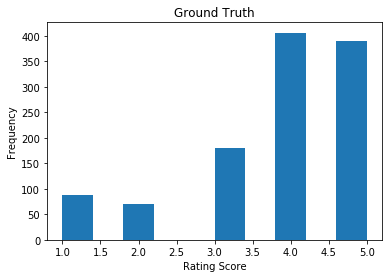

In [0]:
getHistogram('ratingScore', 'Ground Truth')

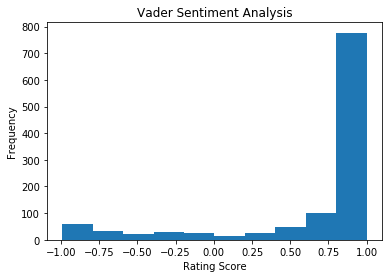

In [0]:
getHistogram('vader', 'Vader Sentiment Analysis')

Both the histograms with ground truth and vader sentiment score depict a similar trend. It shows that there are high number of reviews which have high avg.score, i.e., higher number of positive reviews.

(b)

In [0]:
count= pd.DataFrame(hotelDf.groupby('hotelName')['reviewColumn'].count()).reset_index()

In [0]:
count= pd.DataFrame(hotelDf.groupby('hotelName')['reviewColumn'].count())
count

,reviewColumn
hotelName,
Casa De Damao,5
Daman Ganga Valley Resort Pvt. Ltd,75
Dariya Darshan Hotel,20
Forest Village Holiday Homes,50
Fortune Park Galaxy,100
Ginger Vapi,90
Hotel Grand Heritage,1
Hotel Gurukripa,42
Hotel Jazira,68


Text(0, 0.5, 'No. of Hotels')

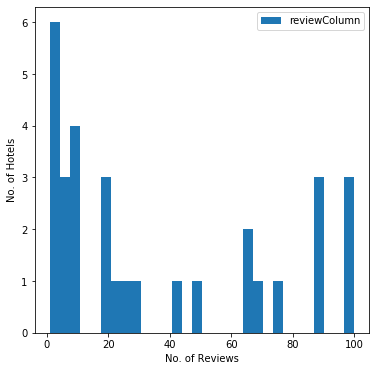

In [0]:
count.plot(bins=30, kind='hist',figsize=(6,6))
plt.xlabel('No. of Reviews')
plt.ylabel('No. of Hotels')

After limiting the maximum number of reviews to 100 while crawling data, it is found that there are three hotels with approximately 100 reviews. It is also found that there are 6 hotels which have less than 10 reviews. 
It is interesting to find that there are no hotels with no. of reviews between (15-20,30-40,45,50-60,80-90)

###Box Plots

(a) Rating Score

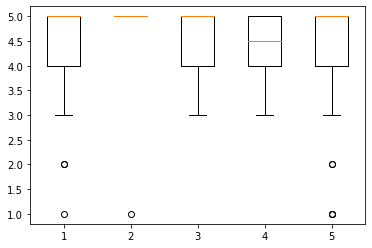

In [0]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0).head(5)
tp5gthotel['hotelName'].values

FortuneParkGalaxy	 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[0]]['ratingScore']
RegentaCentralHarshaVapi	 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[1]]['ratingScore']
HotelTheBlossom = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[2]]['ratingScore']
HotelSilverLeaf	 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[3]]['ratingScore']
GingerVapi	 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[4]]['ratingScore']

data = [FortuneParkGalaxy, RegentaCentralHarshaVapi, HotelTheBlossom, HotelSilverLeaf	, GingerVapi	]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.show()

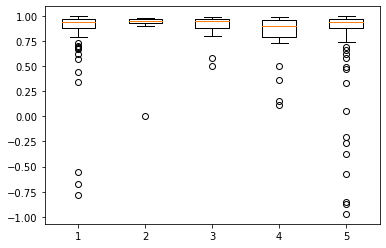

In [0]:
#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel
tp5gthotel1 = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0).head(5)
tp5gthotel1['hotelName'].values

FortuneParkGalaxy	 = finaldf.loc[finaldf['hotelName'] == tp5gthotel1['hotelName'].values[0]]['vader']
RegentaCentralHarshaVapi	 = finaldf.loc[finaldf['hotelName'] == tp5gthotel1['hotelName'].values[1]]['vader']
HotelTheBlossom = finaldf.loc[finaldf['hotelName'] == tp5gthotel1['hotelName'].values[2]]['vader']
HotelSilverLeaf	 = finaldf.loc[finaldf['hotelName'] == tp5gthotel1['hotelName'].values[3]]['vader']
GingerVapi	 = finaldf.loc[finaldf['hotelName'] == tp5gthotel1['hotelName'].values[4]]['vader']

data = [FortuneParkGalaxy, RegentaCentralHarshaVapi, HotelTheBlossom, HotelSilverLeaf	, GingerVapi	]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.show()

(a) Vader Sentiment Score

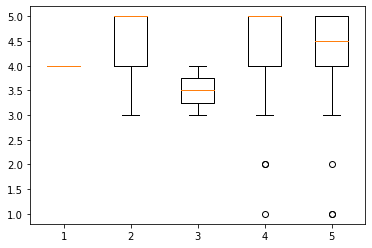

In [0]:
tp5gthotel = hotelRatingDfVd.sort_values('avgRatingScore',ascending=0).head(5)
tp5gthotel['hotelName'].values

HotelGrandHeritage	 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[0]]['ratingScore']
HotelTheBlossom	 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[1]]['ratingScore']
OYO24135HotelAnandInn	 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[2]]['ratingScore']
FortuneParkGalaxy	 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[3]]['ratingScore']
ForestVillageHolidayHomes		 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[4]]['ratingScore']

data = [HotelGrandHeritage, HotelTheBlossom,OYO24135HotelAnandInn , FortuneParkGalaxy	, ForestVillageHolidayHomes	]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.show()

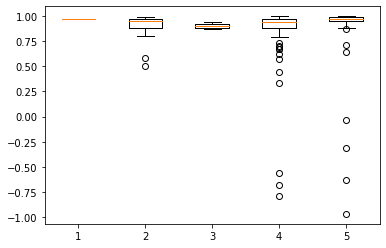

In [0]:
tp5gthotel = hotelRatingDfVd.sort_values('avgRatingScore',ascending=0).head(5)
tp5gthotel['hotelName'].values

HotelGrandHeritage	 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[0]]['vader']
HotelTheBlossom	 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[1]]['vader']
OYO24135HotelAnandInn	 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[2]]['vader']
FortuneParkGalaxy	 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[3]]['vader']
ForestVillageHolidayHomes		 = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].values[4]]['vader']

data = [HotelGrandHeritage, HotelTheBlossom,OYO24135HotelAnandInn , FortuneParkGalaxy	, ForestVillageHolidayHomes	]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.show()

(b)

In [0]:
from functools import reduce
fdf=reduce(lambda x,y: pd.merge(x,y, on='hotelName', how='outer'), [vdf, gtdf, count])
fdf


,vader,ratingScore,reviewColumn
hotelName,,,
Casa De Damao,-0.123180,3.000000,5
Daman Ganga Valley Resort Pvt. Ltd,0.711219,3.920000,75
Dariya Darshan Hotel,0.355205,2.800000,20
Forest Village Holiday Homes,0.839598,4.300000,50
Fortune Park Galaxy,0.854874,4.500000,100
Ginger Vapi,0.775657,4.444444,90
Hotel Grand Heritage,0.966100,4.000000,1
Hotel Gurukripa,0.721090,3.642857,42
Hotel Jazira,0.518172,3.647059,68


In [0]:
fdft5=fdf.sort_values('ratingScore',ascending=0).head()
fdft5

,vader,ratingScore,reviewColumn
hotelName,,,
Regenta Central Harsha Vapi,0.830337,4.500000,8
Fortune Park Galaxy,0.854874,4.500000,100
Hotel The Blossom,0.909266,4.482759,29
Hotel Silver Leaf,0.781905,4.450000,20
Ginger Vapi,0.775657,4.444444,90


In [0]:
fdft5.describe()

,vader,ratingScore,reviewColumn
count,5.000000,5.000000,5.000000
mean,0.830408,4.475441,49.400000
std,0.055153,0.026776,42.435834
min,0.775657,4.444444,8.000000
25%,0.781905,4.450000,20.000000
50%,0.830337,4.482759,29.000000
75%,0.854874,4.500000,90.000000
max,0.909266,4.500000,100.000000


In [0]:
df2 = fdft5.head().describe().loc[['mean', 'std']]
df2.loc['variance'] = df2.loc['std']**2

In [0]:
df2

,vader,ratingScore,reviewColumn
mean,0.830408,4.475441,49.400000
std,0.055153,0.026776,42.435834
variance,0.003042,0.000717,1800.800000


(c) I find both the box plots and description of mean and variance as informative. It is difficult to interpret from the box plots that actual numerical value of the mean, median, variance etc., as they describe data based on quartiles. On the other hand, they clearly explain the outliers in the distribution which is not specially considerd but ignored in the consideration of mean and variance. There could possibly be a change of mean and variance values when the outliers are removed from the data.

###Scatter Plots

(a)

Text(0.5, 0, 'Vader Score')

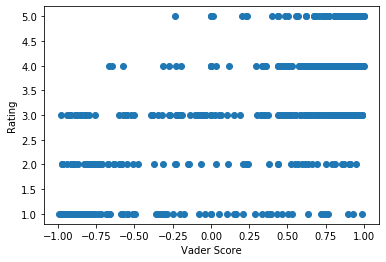

In [0]:
y = hotelDf['ratingScore'].values
x = hotelDf['vader'].values
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Vader Score')

In [0]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0, 0.5, 'Rating')

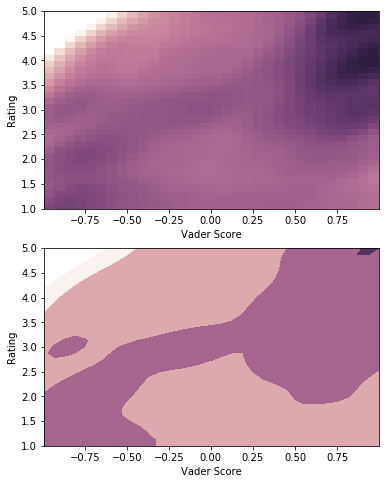

In [0]:
heatmap = sns.cubehelix_palette(light=2, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=heatmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=heatmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

It is observed from both the scatter plot and heat map that, reviews with high user rating have received high vader score. It also shows the trend in the scores, reviews with lower ratings have again received a lower vader scores. This suggests that vader sentiment analysis is close to human analysis.

(b)

Text(0.5, 0, 'Rating Score')

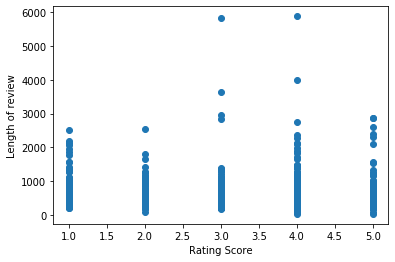

In [0]:
L=[]
for i in range(len(hotelDf)):
  L.append(len(hotelDf['reviewColumn'][i]))
y = L
x = hotelDf['ratingScore'].values
plt.plot(x, y,"o")
plt.ylabel('Length of review')
plt.xlabel('Rating Score')

In [0]:
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,min(y):max(y)]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0, 0.5, 'Length of Review')

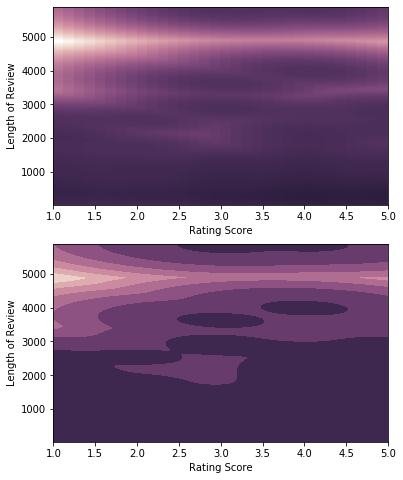

In [0]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(min(y), max(y))
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(min(y), max(y))

ax1.set_xlabel('Rating Score')
ax1.set_ylabel('Length of Review')

ax2.set_xlabel('Rating Score')
ax2.set_ylabel('Length of Review')

Text(0.5, 0, 'Vader Score')

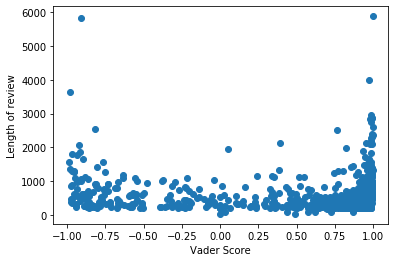

In [0]:
y = L
x = hotelDf['vader'].values
plt.plot(x, y,"o")
plt.ylabel('Length of review')
plt.xlabel('Vader Score')

In [0]:
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,min(y):max(y)]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0, 0.5, 'Length of Review')

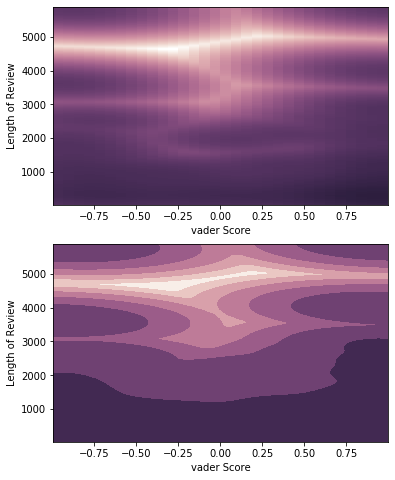

In [0]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(min(y), max(y))
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(min(y), max(y))

ax1.set_xlabel('vader Score')
ax1.set_ylabel('Length of Review')

ax2.set_xlabel('vader Score')
ax2.set_ylabel('Length of Review')

Scatter plot and heat map based on the length of reviews and avg.ground truth score depict that there is no great dependency of length in the rating or sentiment of the review. However, the reviews ranked 4 and above seem to be more in number and couple of them being very longer than the average length of the review.

Scatter plot and heat map based on the length of the reviews and vader sentiment score depicts no great dependency on each other. Moreover, similar trends are observed in the plots based on both average score and vader score.
There are also more number of reviews receiving higher vader score.

(c)

Text(0.5, 0, 'Number of Reviews')

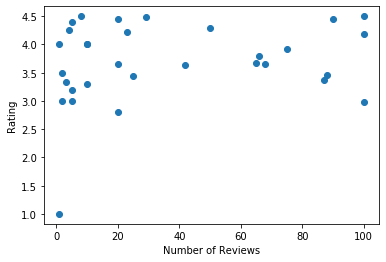

In [0]:
y = fdf['ratingScore'].values
x = fdf['reviewColumn'].values
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Number of Reviews')

Text(0.5, 0, 'Number of Reviews')

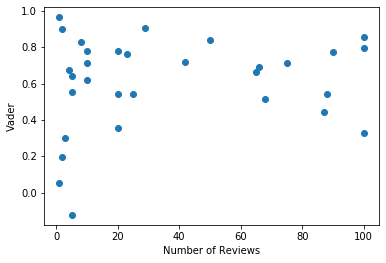

In [0]:
y = fdf['vader'].values
x = fdf['reviewColumn'].values
plt.plot(x, y,"o")
plt.ylabel('Vader')
plt.xlabel('Number of Reviews')

Both the scatter plots show similar trend. There are more number of hotels with <50 number of reviews each. The ones rated high have both higher number of ratings (>80) and also have (<30) number of reviews. Actual top rated hotels are those mentioned in the plots which have both higher number of reviews and high rating